Do some analysis on FPL players

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Load teams and player data
players_data = pd.read_csv('players.csv')
teams_data = pd.read_csv('teams.csv')

# Load GW1 players data
gw1_data = pd.read_csv('data/GW1.csv')
print('No. of players in gameweek 1:', len(gw1_data))

pos_type = {1:'GK', 2:'DEF', 3:'MID', 4:'FWD'}
teams_id = dict(list(zip(teams_data['id'], teams_data['short_name'])))

No. of players in gameweek 1: 573


In [3]:
# Get players with at least 1 minute played
gw1_data_played = gw1_data[gw1_data['minutes'] > 0]
print('No. of players with more than 0 minutes played:', len(gw1_data_played))

No. of players with more than 0 minutes played: 297


In [37]:
# Plot histogram 
def plot_hist(axs, bins, data, xlabel=None, ylabel=None,
              ec='k', fc='lightsteelblue'):
    
    axs.hist(data, bins=bins, histtype='stepfilled', ec=ec,
             fc=fc)
    axs.set_xlim(bins.min(), bins.max())
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    
# Split table by position
def split_by_position(data):
    
    gk_data = data[data['element_type']==1]
    def_data = data[data['element_type']==2]
    mid_data = data[data['element_type']==3]
    fwd_data = data[data['element_type']==4]
    
    return gk_data, def_data, mid_data, fwd_data

# Get the mean, 25th percentile, and maximum points
def points_stats_summary(data):
    
    median = np.median(data)
    upper_quartile = np.percentile(data, 90)
    max_val = np.max(data)
    
    return median, upper_quartile, max_val

# Get top point earning players
def top_points_players(data, n_players):
    
    data = data.sort_values(by='total_points', ascending=False)
    
    return data[:n_players]

# Print top players summary
def top_players_summary(df, fpl_players):
    
    player_name = df.iloc[0]['web_name']
    team =  teams_id[df.iloc[0]['team']]
    points = df.iloc[0]['total_points']
    value = df.iloc[0]['value']/10
    owned = df.iloc[0]['selected'] * 100 / fpl_players
    position = df.iloc[0]['element_type']
    
    print('Top {}: {} ({}), Points: {}, Value: £{}M, selected by: {:.1f}%'.format(
        pos_type[position], player_name, team, points, value, owned))

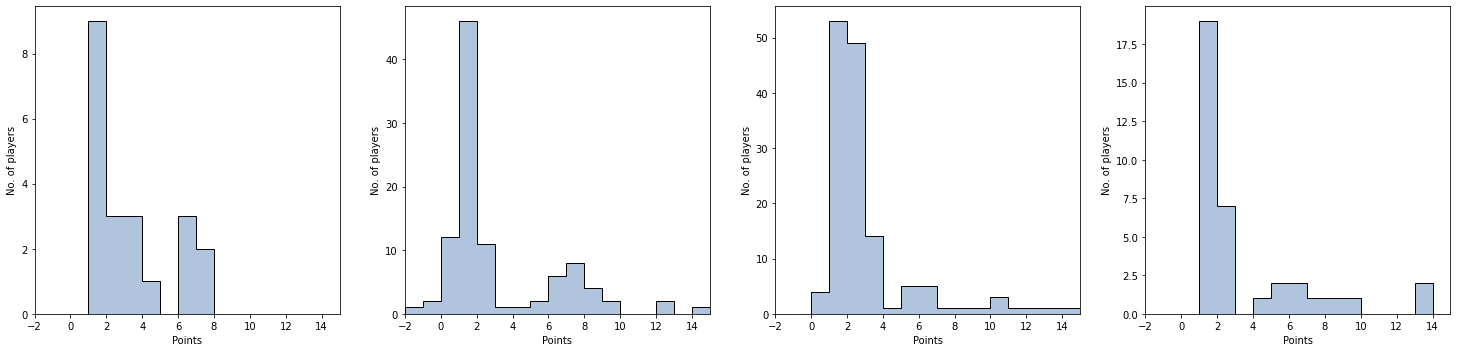

GK points  - Median:2.0, 90th percentile:6.0, Max:7
DEF points - Median:1.0, 90th percentile:7.0, Max:15
MID points - Median:2.0, 90th percentile:6.0, Max:15
FWD points - Median:1.0, 90th percentile:7.5, Max:13


In [7]:
# Plot total points histogram
gw1_total_points = gw1_data_played['total_points'].values
total_points_bins = np.arange(gw1_total_points.min(), gw1_total_points.max()+1)

xlabel = 'Points'
ylabel = 'No. of players'
fig, axs = plt.subplots(1, 4, figsize=(20.5, 5))

#plot_hist(axs[0], bins=total_points_bins, data=gw1_total_points,
#          xlabel=xlabel, ylabel=ylabel)

# Plot total points histogram for each position
gw1_gk = gw1_data_played[gw1_data_played['element_type']==1]
gk_bins = np.arange(gw1_gk['total_points'].min(), gw1_gk['total_points'].max()+1)
plot_hist(axs[0], bins=total_points_bins, data=gw1_gk['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_def = gw1_data_played[gw1_data_played['element_type']==2]
def_bins = np.arange(gw1_def['total_points'].min(), gw1_def['total_points'].max()+1)
plot_hist(axs[1], bins=total_points_bins, data=gw1_def['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_mid = gw1_data_played[gw1_data_played['element_type']==3]
mid_bins = np.arange(gw1_mid['total_points'].min(), gw1_mid['total_points'].max()+1)
plot_hist(axs[2], bins=total_points_bins, data=gw1_mid['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_fwd = gw1_data_played[gw1_data_played['element_type']==4]
fwd_bins = np.arange(gw1_fwd['total_points'].min(), gw1_fwd['total_points'].max()+1)
plot_hist(axs[3], bins=total_points_bins, data=gw1_fwd['total_points'], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

gk_median, gk_uq, gk_max = points_stats_summary(gw1_gk_points['total_points'])
def_median, def_uq, def_max = points_stats_summary(gw1_def['total_points'])
mid_median, mid_uq, mid_max = points_stats_summary(gw1_mid['total_points'])
fwd_median, fwd_uq, fwd_max = points_stats_summary(gw1_fwd['total_points'])

print('GK points  - Median:{}, 90th percentile:{}, Max:{}'.format(gk_median, gk_uq, gk_max))
print('DEF points - Median:{}, 90th percentile:{}, Max:{}'.format(def_median, def_uq, def_max))
print('MID points - Median:{}, 90th percentile:{}, Max:{}'.format(mid_median, mid_uq, mid_max))
print('FWD points - Median:{}, 90th percentile:{}, Max:{}'.format(fwd_median, fwd_uq, fwd_max))

In [38]:
# Split data into positions
gw1_gk, gw1_def, gw1_mid, gw1_fwd = split_by_position(gw1_data)
gw1_pos = [gw1_gk, gw1_def, gw1_mid, gw1_fwd]
top_pos = [top_points_players(df, 10) for df in gw1_pos]

# Need to account for tied top point earners
print('='*20 + ' GAMEWEEK 01 ' + '='*20)
for df in top_pos:
    top_players_summary(df, 9.3e6)

==================== GAMEWEEK 01 ====================
Top GK: Ederson (MCI), Points: 7, Value: £5.5M, selected by: 13.3%
Top DEF: Schär (NEW), Points: 15, Value: £4.5M, selected by: 0.4%
Top MID: Groß (BHA), Points: 15, Value: £5.5M, selected by: 0.1%
Top FWD: Mitrović (FUL), Points: 13, Value: £6.5M, selected by: 5.5%


In [39]:
# Do the same as above
gw2_data = pd.read_csv('data/GW2.csv')
gw2_pos = split_by_position(gw2_data)
top_pos = [top_points_players(df, 10) for df in gw2_pos]

print('='*20 + ' GAMEWEEK 02 ' + '='*20)
for df in top_pos:
    top_players_summary(df, 9.4e6)

==================== GAMEWEEK 02 ====================
Top GK: Sá (WOL), Points: 15, Value: £5.0M, selected by: 3.4%
Top DEF: Mee (BRE), Points: 14, Value: £4.5M, selected by: 0.3%
Top MID: Rodrigo (LEE), Points: 15, Value: £6.0M, selected by: 1.7%
Top FWD: Jesus (ARS), Points: 19, Value: £8.0M, selected by: 66.1%


In [40]:
# Do the same as above
gw3_data = pd.read_csv('data/GW3.csv')
gw3_pos = split_by_position(gw3_data)
top_pos = [top_points_players(df, 10) for df in gw3_pos]

print('='*20 + ' GAMEWEEK 03 ' + '='*20)
for df in top_pos:
    top_players_summary(df, 9.5e6)

==================== GAMEWEEK 03 ====================
Top GK: Martínez (AVL), Points: 10, Value: £5.0M, selected by: 5.1%
Top DEF: Saliba (ARS), Points: 14, Value: £4.5M, selected by: 5.5%
Top MID: Ødegaard (ARS), Points: 16, Value: £6.4M, selected by: 10.8%
Top FWD: Adams (SOU), Points: 12, Value: £6.4M, selected by: 0.5%
